# Individual Project - Marketing Analytics
## Sentimental Analysis on Offers in Coffee shop
##### Name - Rishabh Patil
##### Student Id - 0770055

In [6]:
import re
import math
import json
import progressbar
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [7]:
moa = pd.read_csv('master_offer_analysis.csv')

In [8]:
moa.shape

(66501, 21)

In [9]:
moa.head()

,age,became_member_on,bogo,customer_id,difficulty,discount,duration,email,gender,income,...,mobile,offer_id,offer_successful,reward,social,start_month,start_year,time,total_amount,web
0,75.0,2017-05-09,1.0,78afa995795e4d85b5d9ceeca43f5fef,5,0.0,7,1.0,0,100000.0,...,1.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,5,0.0,5,2017,0.0,37.67,1.0
1,75.0,2017-05-09,0.0,78afa995795e4d85b5d9ceeca43f5fef,0,0.0,3,1.0,0,100000.0,...,1.0,5a8bc65990b245e5a138643cd4eb9837,0,0,1.0,5,2017,7.0,49.39,0.0
2,75.0,2017-05-09,1.0,78afa995795e4d85b5d9ceeca43f5fef,10,0.0,7,1.0,0,100000.0,...,1.0,ae264e3637204a6fb9bb56bc8210ddfd,1,10,1.0,5,2017,17.0,48.28,0.0
3,75.0,2017-05-09,1.0,78afa995795e4d85b5d9ceeca43f5fef,5,0.0,5,1.0,0,100000.0,...,1.0,f19421c1d4aa40978ebb69ca19b0e20d,1,5,1.0,5,2017,21.0,48.28,1.0
4,68.0,2018-04-26,0.0,e2127556f4f64592b11af22de27a7932,10,1.0,7,1.0,1,70000.0,...,1.0,2906b810c7d4411798c6938adc9daaa5,0,2,0.0,4,2018,0.0,0.00,1.0


In [10]:
moa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66501 entries, 0 to 66500
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               66501 non-null  float64
 1   became_member_on  66501 non-null  object 
 2   bogo              66501 non-null  float64
 3   customer_id       66501 non-null  object 
 4   difficulty        66501 non-null  int64  
 5   discount          66501 non-null  float64
 6   duration          66501 non-null  int64  
 7   email             66501 non-null  float64
 8   gender            66501 non-null  int64  
 9   income            66501 non-null  float64
 10  informational     66501 non-null  float64
 11  mobile            66501 non-null  float64
 12  offer_id          66501 non-null  object 
 13  offer_successful  66501 non-null  int64  
 14  reward            66501 non-null  int64  
 15  social            66501 non-null  float64
 16  start_month       66501 non-null  int64 

### Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x1d85cc2e130>,
 [Text(-0.34305042823271714, 1.0451394183023381, '0'),
  Text(0.34305033037970095, -1.0451394504210325, '1')],
 [Text(-0.1871184153996639, 0.5700760463467298, '60.10%'),
  Text(0.1871183620252914, -0.5700760638660177, '39.90%')])

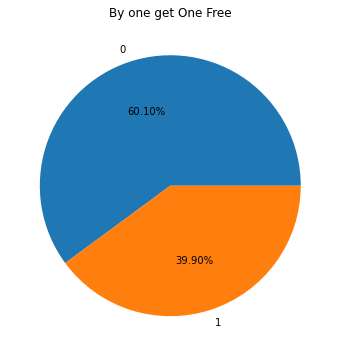

In [14]:
import matplotlib.pyplot as plt
labels = ['0','1']
plt.figure(figsize=(6, 6))
plt.title("By one get One Free", fontdict=None, loc='center', pad=None)
plt.pie(moa.groupby('bogo')['customer_id'].count(), autopct='%1.2f%%',labels= labels)

([<matplotlib.patches.Wedge at 0x1d85cbd6700>,
 [Text(-0.3367738706146124, 1.0471787622327204, '0'),
  Text(0.3367737725706592, -1.0471787937637613, '1')],
 [Text(-0.18369483851706128, 0.571188415763302, '59.90%'),
  Text(0.1836947850385414, -0.5711884329620516, '40.10%')])

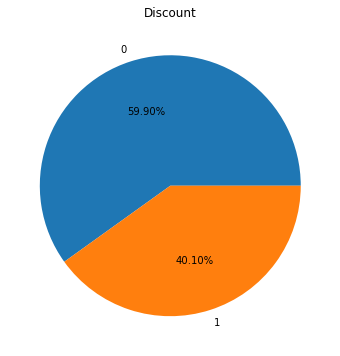

In [13]:
labels = ['0','1']
plt.figure(figsize=(6, 6))
plt.title("Discount", fontdict=None, loc='center', pad=None)
plt.pie(moa.groupby('discount')['customer_id'].count(), autopct='%1.2f%%',labels= labels)

([<matplotlib.patches.Wedge at 0x1d85cd26eb0>,
 [Text(0.8899248018218077, 0.6465553704845521, 'CAD 0'),
  Text(-0.339048771747858, 1.0464444229753767, 'CAD 2'),
  Text(-1.04568099566966, 0.34139603878092756, 'CAD 3'),
  Text(-0.6460718063089925, -0.8902759241339934, 'CAD 5'),
  Text(0.8906572768525199, -0.6455459822426701, 'CAD 10')],
 [Text(0.48541352826644046, 0.3526665657188466, '20.00%'),
  Text(-0.1849356936806498, 0.5707878670774781, '19.97%'),
  Text(-0.5703714521834509, 0.1862160211532332, '10.01%'),
  Text(-0.3524028034412686, -0.48560504952763267, '30.06%'),
  Text(0.4858130601013745, -0.35211599031418367, '19.96%')])

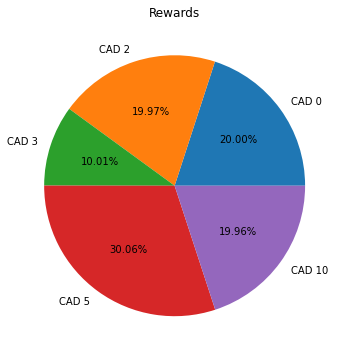

In [17]:
labels = ['CAD 0','CAD 2','CAD 3','CAD 5','CAD 10']
plt.figure(figsize=(6, 6))
plt.title("Rewards", fontdict=None, loc='center', pad=None)
plt.pie(moa.groupby('reward')['customer_id'].count(), autopct='%1.2f%%',labels= labels)

([<matplotlib.patches.Wedge at 0x1d85cd86970>,
 [Text(-0.0978513372843247, 1.0956391357521278, '0'),
  Text(0.09785143986546375, -1.0956391265906196, '1')],
 [Text(-0.053373456700540736, 0.5976213467738879, '52.84%'),
  Text(0.053373512653889316, -0.5976213417767016, '47.16%')])

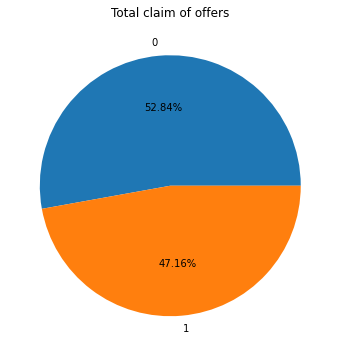

In [18]:
labels = ['0','1']
plt.figure(figsize=(6, 6))
plt.title("Total claim of offers", fontdict=None, loc='center', pad=None)
plt.pie(moa.groupby('offer_successful')['customer_id'].count(), autopct='%1.2f%%',labels= labels)

Text(0, 0.5, 'Count of Cutomers')

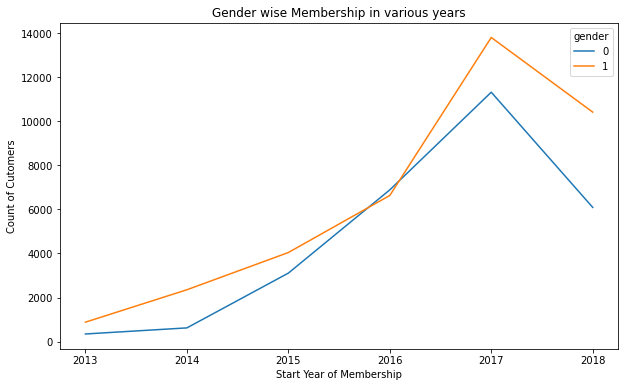

In [19]:
m_date = moa.groupby(['start_year', 'gender']).size()
m_date = m_date.reset_index()
m_date.columns = ['start_year', 'gender', 'count']
plt.figure(figsize=(10, 6))
plt.title("Gender wise Membership in various years", fontdict=None, loc='center', pad=None)
sns.lineplot(x='start_year', y='count', hue='gender', data=m_date)
plt.xlabel('Start Year of Membership')
plt.ylabel('Count of Cutomers')

### Process on data

In [21]:
order = ['offer_id', 'total_amount']
order.extend([elem for elem in moa.columns if elem not in order])

moa = moa[order]
moa = moa.drop(columns=['time', 'customer_id', 'email', 'informational', 'became_member_on'])
moa.head()

,offer_id,total_amount,age,bogo,difficulty,discount,duration,gender,income,mobile,offer_successful,reward,social,start_month,start_year,web
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,37.67,75.0,1.0,5,0.0,7,0,100000.0,1.0,1,5,0.0,5,2017,1.0
1,5a8bc65990b245e5a138643cd4eb9837,49.39,75.0,0.0,0,0.0,3,0,100000.0,1.0,0,0,1.0,5,2017,0.0
2,ae264e3637204a6fb9bb56bc8210ddfd,48.28,75.0,1.0,10,0.0,7,0,100000.0,1.0,1,10,1.0,5,2017,0.0
3,f19421c1d4aa40978ebb69ca19b0e20d,48.28,75.0,1.0,5,0.0,5,0,100000.0,1.0,1,5,1.0,5,2017,1.0
4,2906b810c7d4411798c6938adc9daaa5,0.00,68.0,0.0,10,1.0,7,1,70000.0,1.0,0,2,0.0,4,2018,1.0


In [22]:
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
portfolio.rename(columns={'id': 'offer_id'}, inplace=True)
for index, row in portfolio.iterrows():
    for channel in ['web', 'email', 'social', 'mobile']:
        if channel in portfolio.loc[index, 'channels']:
            portfolio.loc[index, channel] = 1
        else:
            portfolio.loc[index, channel] = 0
portfolio.drop(columns='channels', inplace=True)
for index, row in portfolio.iterrows():
    for offertype in ['bogo', 'informational', 'discount']:
        if offertype in portfolio.loc[index, 'offer_type']:
            portfolio.loc[index, offertype] = 1
        else:
            portfolio.loc[index, offertype] = 0
portfolio.drop(columns='offer_type', inplace=True)

In [23]:
def calculate_percentage_success():
    successful_count = moa[['offer_id', 'offer_successful']].groupby(
        'offer_id').sum().reset_index()

    offer_count = moa['offer_id'].value_counts()

    offer_count = pd.DataFrame(list(zip(offer_count.index.values,
                                        offer_count.values)),
                               columns=['offer_id', 'count'])

    successful_count = successful_count.sort_values('offer_id')

    offer_count = offer_count.sort_values('offer_id')

    percent_success = pd.merge(offer_count, successful_count, on="offer_id")

    percent_success['percent_success'] = (
        100 * percent_success['offer_successful'] / percent_success['count'])

    percent_success = pd.merge(percent_success, portfolio, on="offer_id")

    percent_success = percent_success.drop(columns=['offer_successful'])

    percent_success = percent_success.sort_values('percent_success', ascending=False)

    return percent_success.reset_index(drop=True)

In [24]:
percent_success = calculate_percentage_success()
percent_success

,offer_id,count,percent_success,reward,difficulty,duration,web,email,social,mobile,bogo,informational,discount
0,fafdcd668e3743c1bb461111dcafc2a4,6652,75.285628,2,10,10,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1,2298d6c36e964ae4a3e7e9706d1fb8c2,6655,72.742299,3,7,7,1.0,1.0,1.0,1.0,0.0,0.0,1.0
2,f19421c1d4aa40978ebb69ca19b0e20d,6576,61.618005,5,5,5,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,ae264e3637204a6fb9bb56bc8210ddfd,6683,54.646117,10,10,7,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,4d5c57ea9a6940dd891ad53e9dbe8da0,6593,51.721523,10,10,5,1.0,1.0,1.0,1.0,1.0,0.0,0.0
5,9b98b8c7a33c4b65b9aebfe6a799e6d9,6685,48.287210,5,5,7,1.0,1.0,0.0,1.0,1.0,0.0,0.0
6,2906b810c7d4411798c6938adc9daaa5,6631,47.730357,2,10,7,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7,0b1e1539f2cc45b7b9fa7c272da2e1d7,6726,45.762712,5,20,10,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8,3f207df678b143eea3cee63160fa8bed,6657,7.721196,0,0,4,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9,5a8bc65990b245e5a138643cd4eb9837,6643,6.277284,0,0,3,0.0,1.0,1.0,1.0,0.0,1.0,0.0


- Here we try to find specific offer's success rate to use it in machine learning model to predict success rate of any offer to any customer.

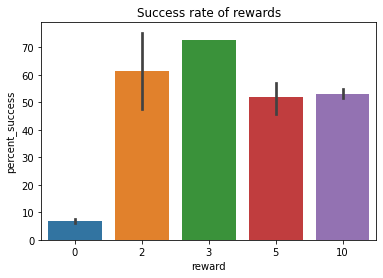

In [25]:
sns.barplot(y = "percent_success", x = "reward", data = percent_success).set_title("Success rate of rewards")
plt.show()

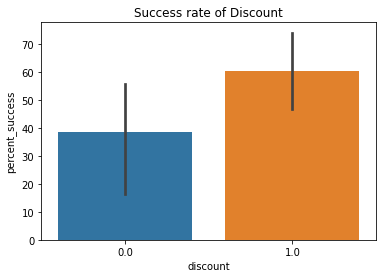

In [26]:
sns.barplot(y = "percent_success", x = "discount", data = percent_success).set_title("Success rate of Discount")
plt.show()

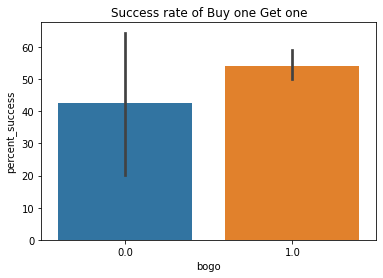

In [27]:
sns.barplot(y = "percent_success", x = "bogo", data = percent_success).set_title("Success rate of Buy one Get one")
plt.show()

## Various Machine Learning Classification Models

In [18]:
from sklearn.metrics import confusion_matrix

def c_matrix(y_test,y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot = True, fmt = 'g',cmap='YlGn')
    plt.title("Confussion Matrix", fontsize = 20)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn
# Splitting the dataset into the Training set and Test set
X = moa.drop(columns=['offer_successful'])
y = moa.filter(['offer_successful'])
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 0)

offer_id_train = X_train[:, 0]
total_amount_train = X_train[:, 1]
X_train = X_train[:, 2:].astype('float64')

offer_id_test = X_test[:, 0]
total_amount_test = X_test[:, 1]
X_test = X_test[:, 2:].astype('float64')
y_train = y_train.ravel()
y_test = y_test.ravel()

### Naive_bayes

None
0.6785955943162169
0.7157012702001729
0.8537204505790893
0.6160980077856653


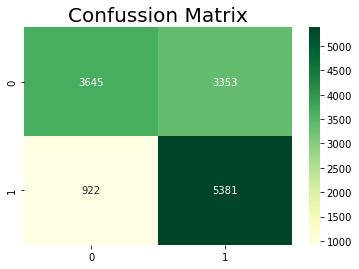

In [20]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=c_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
print(accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, pos_label=1))
print(sklearn.metrics.recall_score(y_test, y_pred,pos_label=1))
print(sklearn.metrics.precision_score(y_test, y_pred,pos_label=1))

### Decision Tree Classification Model

None
0.6982933614013984
0.6796007984031937
0.6752340155481517
0.6840244294439087


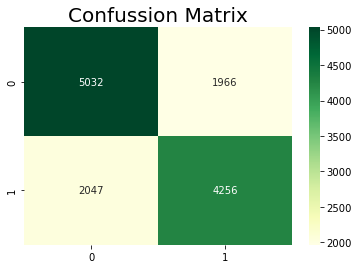

In [21]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)  

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

cm = c_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
print(accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, pos_label=1))
print(sklearn.metrics.recall_score(y_test, y_pred,pos_label=1))
print(sklearn.metrics.precision_score(y_test, y_pred,pos_label=1))

### Random Forest Model

None
0.7211487858055785
0.7081136381521995
0.7137870855148342
0.7025296689569019


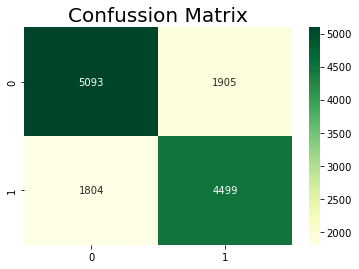

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)  

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

cm = c_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
print(accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, pos_label=1))
print(sklearn.metrics.recall_score(y_test, y_pred,pos_label=1))
print(sklearn.metrics.precision_score(y_test, y_pred,pos_label=1))

### KNN Model

None
0.646417562589279
0.5412154911715931
0.4401078851340631
0.7026342451874367


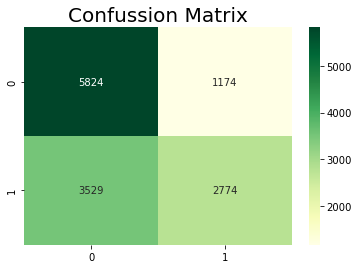

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)  

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

cm = c_matrix(y_test, y_pred)
print(cm)

# Evaluate the results
print(accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, pos_label=1))
print(sklearn.metrics.recall_score(y_test, y_pred,pos_label=1))
print(sklearn.metrics.precision_score(y_test, y_pred,pos_label=1))

| Model Name | Accuracy score | F1-score |
| :- | :- | :- | 
|  Naive Bayes Model        | 67% | 71% |
|  Decision Tree            | 69% | 68% | 
|  Random Forest            | 72% | 70% | 
|  KNN                      | 64% | 54% | 

| Model Name | recall_score | precision_score |
| :- | :- | :- | 
|  Naive Bayes Model        | 85% | 61% |
|  Decision Tree            | 67% | 78% | 
|  Random Forest            | 75% | 70% | 
|  KNN                      | 44% | 70% | 

- Here I tried to do sentimental analysis on customer will respond to an offer in coffee shop or not. 
- In this project I tried to find the accuracy, F1-score, recall score and precision score by various machine learning models.
- I used Naive Bayes, Decision tree, Random Forest, KNN models to find out the best prediction.
- After getting all values I compared them all and try to find out which model is working as best model.
- Accuracy score of random forest model has best accuracy score. Accuracy score of random forest  is 72%, F1 score 70%, recall score 75% and precision score is 70%. From this we can observe that this  model has good performance and also it is not overfit.  

## Observation and Recommendation:

- From above, we can observe that the success rate of offers is not more. The reason can be different like people are not well informed that they are getting offers on purchase of coffee or how to get that offer's benefit. 
- So, the marketing team should focus on an easy way to let people know about the offers and how they can get benefitted from purchasing coffee.
- They can also work on an easy way of claiming the offer so more people can easily get benefits and trust between the coffee shop and customer will get increase.
- We can also observe that the success rate of rewards is more. So, the marketing team can make the time period of claiming the reward short. So, people use it as soon as they get it and for more such rewards they will come again in a short time period.
- Buy one get one free offer are getting less success rate. The reason may be people are coming without any partner so they don't want that offer. So, the Marketing team can give some time period like one day to claim the offer. They can also give options like claiming any other compliment with coffee.
- By implementing these new and easy ways, the coffee shop will also benefit to attract new customers.
- By using a machine learning model marketing team can predict that how much offer will get success on new customers so they can give offers to them. 